# Problem-1

In [1]:

Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [27]:
x=np.arange(0,12)
y=np.sin(Max)

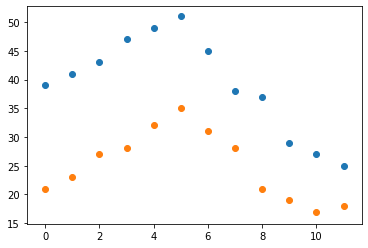

In [36]:
plt.scatter(x,Max)
plt.scatter(x,Min)

In [37]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, x,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, x,
                                      Min, [-40, 20, 0])

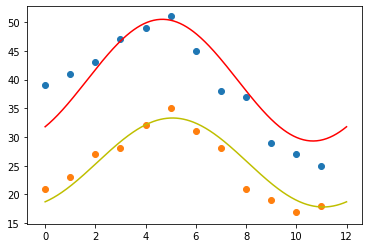

In [39]:
days = np.linspace(0, 12, num=365)
plt.scatter(x,Max)
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.scatter(x,Min)
plt.plot(days, yearly_temps(days, *res_min), 'y-')

# Problem2

In [40]:
import pandas as pd

In [41]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [42]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [48]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [52]:
titanic.sex.fillna(method='ffill',inplace=True)

In [53]:
titanic.sex.isnull().sum()

0

In [54]:
titanic.sex=lbl.fit_transform(titanic.sex)

In [74]:
d=titanic['sex'].value_counts()
d

1    844
0    466
Name: sex, dtype: int64

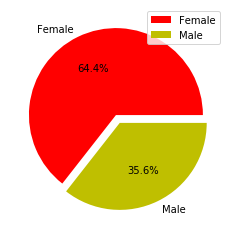

In [82]:
labels = 'Female', 'Male'
colors=['r','y']
explode = (0, 0.1) 
plt.pie(d,labels =labels,colors=colors,autopct='%1.1f%%',explode=explode)
plt.legend(labels,loc='best')

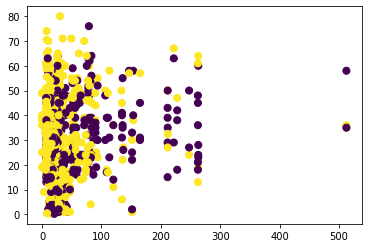

In [91]:
plt.scatter(titanic['fare'],titanic['age'],c=titanic['sex'],s=50)